## Quick Start


In [2]:
%matplotlib inline
import site
site.addsitedir(r'C:\Users\Ciaran\Documents\pycotools')
from pycotools import model, models, viz, tasks, misc
import os
import pandas

C:\Users\Ciaran\Documents\pycotools\pycotools\viz.py:117: FutureWarning: The pandas.parser module is deprecated and will be removed in a future version. Please import from the pandas.io.parser instead
  from pandas.parser import CParserError


root:INFO:25:    Initializing pycotools
root:INFO:26:    Initializing logging System
root:INFO:27:    logging config file at: C:\Users\Ciaran\Documents\pycotools\pycotools\logging_config.conf


In [11]:
working_directory = r'C:\Users\Ciaran\Documents\PycotoolsQuickStart'
copasi_file = os.path.join(working_directory, 'quick_start_model.cps')

if os.path.isfile(copasi_file):
    os.remove(copasi_file)

with model.Build(copasi_file) as m:
    m.add('compartment', 'Cell')
    
    model.Reaction(m, 'S bind E', 'S + E = ES', '')
    
michaelis_menten = model.Model(copasi_file)

print(michaelis_menten.reactions)

    

[]


## Get Kholodenko Model 

In [2]:
## Get handle to KholodenkoModels class
k = models.KholodenkoModels()

#Pick a filename
filename = r'C:\Users\Ciaran\Documents\KholodenkoModel\kholodenko_model.cps'

## The published model is in the `published` attribute and can be written to file
## with the to_file attribute
k.to_file(k.published, filename)

## Make sure file exists
assert os.path.isfile(filename)

## Make a Pycotools model

In [3]:
mod = model.Model(filename)
mod

Model(name=Kholodenko2000 - Ultrasensitivity and negative feedback bring oscillations in MAPK cascade, time_unit=s, volume_unit=l, quantity_unit=nmol)

### Look at reactions

In [29]:
for react in mod.reactions:
    print react

Reaction(name="MAPKKK activation", expression="Mos -> Mos-P; Erk2-PP", rate_law="Function(name="Function for MAPKKK activation", key="Function_40", expression="V1*MKKK/((1+(MAPK_PP/Ki)^n)*(K1+MKKK))", roles={})", parameters={'n)': 0.1, 'MKKK': 0.1, '(MAPK_PP': 0.1, '(K1': 0.1, '((1': 0.1, 'V1': 0.1, 'Ki)': 0.1, 'MKKK))': 0.1}, reversible=False, simulation_type="reactions")
Reaction(name="MAPKKK inactivation", expression="Mos-P -> Mos", rate_law="Function(name="Function for MAPKKK inactivation", key="Function_41", expression="V2*MKKK_P/(KK2+MKKK_P)", roles={})", parameters={'(KK2': 0.1, 'MKKK_P': 0.1, 'V2': 0.1, 'MKKK_P)': 0.1}, reversible=False, simulation_type="reactions")
Reaction(name="phosphorylation of MAPKK", expression="Mek1 -> Mek1-P; Mos-P", rate_law="Function(name="Function for phosphorylation of MAPKK", key="Function_42", expression="k3*MKKK_P*MKK/(KK3+MKK)", roles={})", parameters={'k3': 0.1, 'MKKK_P': 0.1, 'MKK)': 0.1, 'MKK': 0.1, '(KK3': 0.1}, reversible=False, simulation

## Run Time Course

### Configure data for parameter estimation
Copasi output does not contain headers identical to model components. Therefore if we want use output from copasi to fit a model we need to configure the file first. 

In [21]:
TC = tasks.TimeCourse(mod, end=100, step_size=10, intervals=10)
print "data saved to '{}'".format(TC.report_name)


data saved to 'C:\Users\Ciaran\Documents\KholodenkoModel\TimeCourseData.txt'


In [22]:
pandas.read_csv(TC.report_name, sep='\t')

,Time,[Mek1-P],[Mek1],[Mos-P],[Mos],[Erk2-PP],[Erk2-P],[Erk2],[Mek1-PP]
0,0,10.000000,280.000,10.00000,90.0000,10.0000,10.000000,280.000000,10.0000
1,10,0.605439,263.408,11.29330,88.7067,24.5599,0.074704,275.365000,35.9865
2,20,0.639410,245.974,11.08950,88.9105,47.1393,0.063472,252.797000,53.3871
3,30,0.698695,229.860,9.79881,90.2012,83.6043,0.055757,216.340000,69.4409
4,40,0.791766,216.190,8.07758,91.9224,131.5200,0.050182,168.430000,83.0185
5,50,0.935252,205.279,6.30743,93.6926,187.4360,0.046222,112.517000,93.7855
6,60,1.158630,197.008,4.69908,95.3009,245.9250,0.043054,54.031800,101.8340
7,70,1.508270,191.018,3.37066,96.6293,291.1510,0.038429,8.810110,107.4740
8,80,2.036400,186.827,2.38321,97.6168,298.8320,0.035121,1.132820,111.1360
9,90,2.774850,183.926,1.71514,98.2849,298.9640,0.034413,1.001490,113.2990


In [23]:
misc.correct_copasi_timecourse_headers(TC.report_name)  ##Automatically overwrites original file

,Time,Mek1-P,Mek1,Mos-P,Mos,Erk2-PP,Erk2-P,Erk2,Mek1-PP
0,0,10.000000,280.000,10.00000,90.0000,10.0000,10.000000,280.000000,10.0000
1,10,0.605439,263.408,11.29330,88.7067,24.5599,0.074704,275.365000,35.9865
2,20,0.639410,245.974,11.08950,88.9105,47.1393,0.063472,252.797000,53.3871
3,30,0.698695,229.860,9.79881,90.2012,83.6043,0.055757,216.340000,69.4409
4,40,0.791766,216.190,8.07758,91.9224,131.5200,0.050182,168.430000,83.0185
5,50,0.935252,205.279,6.30743,93.6926,187.4360,0.046222,112.517000,93.7855
6,60,1.158630,197.008,4.69908,95.3009,245.9250,0.043054,54.031800,101.8340
7,70,1.508270,191.018,3.37066,96.6293,291.1510,0.038429,8.810110,107.4740
8,80,2.036400,186.827,2.38321,97.6168,298.8320,0.035121,1.132820,111.1360
9,90,2.774850,183.926,1.71514,98.2849,298.9640,0.034413,1.001490,113.2990


## Parameter Estimation
Configure the estimation:
    * 

In [17]:

PE = tasks.ParameterEstimation(mod, TC.report_name,
                               method='genetic_algorithm_sr',
                               population_size=100, 
                               number_of_generations=300, 
                               metabolites=[], global_quantities=[],
                               lower_bound=1e-4, upper_bound=1e3,
)

## Writes csv file. Manually configure or specify variables during instantiation
PE.write_config_file()

## Setup the estimation problem 
PE.setup()

Model(name=Kholodenko2000 - Ultrasensitivity and negative feedback bring oscillations in MAPK cascade, time_unit=s, volume_unit=l, quantity_unit=nmol)

In [ ]:
## Run the estimation

In [34]:
PE.run()

In [ ]:
## Plot the results

pycotools.viz:INFO:1669:    figure saved to "C:\Users\Ciaran\Documents\KholodenkoModel\ParameterEstimationPlots\TimeCourseData\Mek1.png"
pycotools.viz:INFO:1669:    figure saved to "C:\Users\Ciaran\Documents\KholodenkoModel\ParameterEstimationPlots\TimeCourseData\Mek1-P.png"


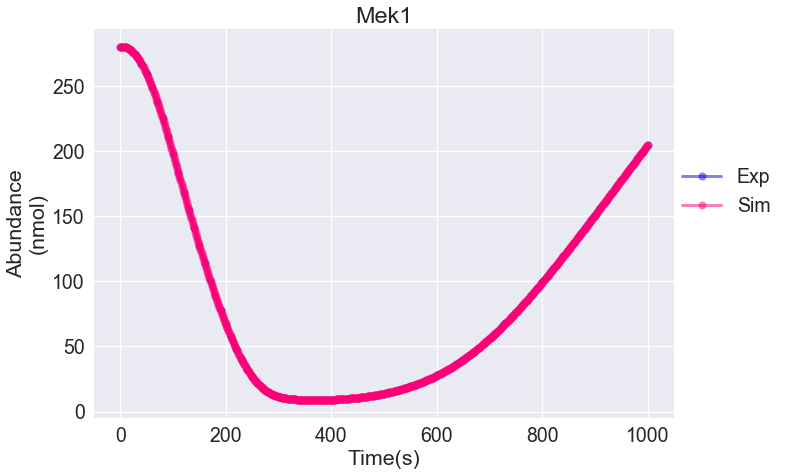

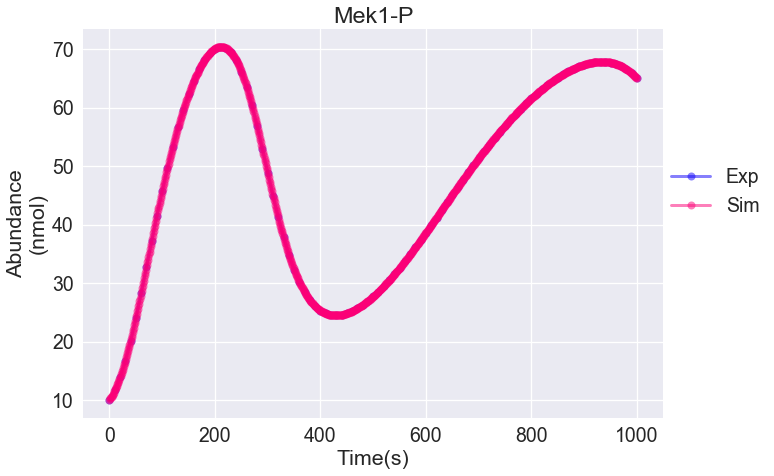

In [7]:
viz.PlotParameterEstimation(PE, savefig=True, y=['Mek1', 'Mek1-P'])

In [ ]:
# Run Multiple Parameter Estimations

In [24]:
MPE = tasks.MultiParameterEstimation(
    mod, TC.report_name,
    method='genetic_algorithm_sr',
    population_size=150,
    number_of_generations=400, 
    metabolites=[], global_quantities=[],
    lower_bound=1e-4, upper_bound=1e3,
    copy_number=3, pe_number=3
)

## Writes csv file. Manually configure or specify variables during instantiation
MPE.write_config_file()

## Setup the estimation problem 
MPE.setup()

{0: Model(name=Kholodenko2000 - Ultrasensitivity and negative feedback bring oscillations in MAPK cascade, time_unit=s, volume_unit=l, quantity_unit=nmol),
 1: Model(name=Kholodenko2000 - Ultrasensitivity and negative feedback bring oscillations in MAPK cascade, time_unit=s, volume_unit=l, quantity_unit=nmol),
 2: Model(name=Kholodenko2000 - Ultrasensitivity and negative feedback bring oscillations in MAPK cascade, time_unit=s, volume_unit=l, quantity_unit=nmol)}

In [25]:
MPE.run()

## Plot

pycotools.viz:INFO:1350:    Plotting "Mek1-P"
pycotools.viz:INFO:1350:    Plotting "Mek1"
pycotools.viz:INFO:1350:    Plotting "Mos-P"
pycotools.viz:INFO:1350:    Plotting "Mos"
pycotools.viz:INFO:1350:    Plotting "Erk2-PP"
pycotools.viz:INFO:1350:    Plotting "Erk2-P"
pycotools.viz:INFO:1350:    Plotting "Erk2"
pycotools.viz:INFO:1350:    Plotting "Mek1-PP"


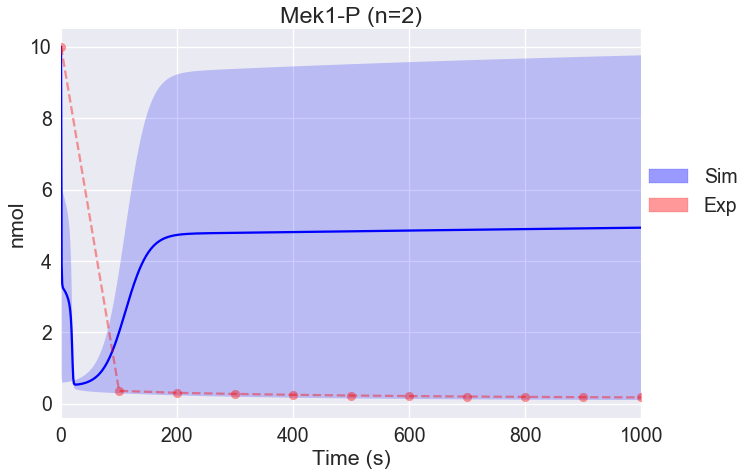

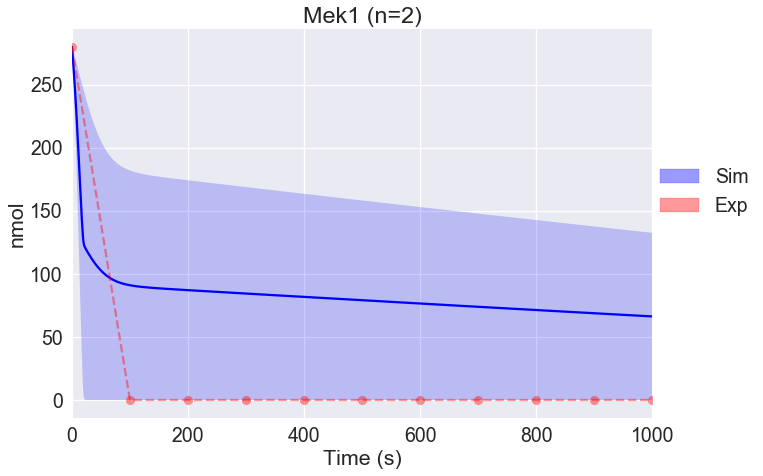

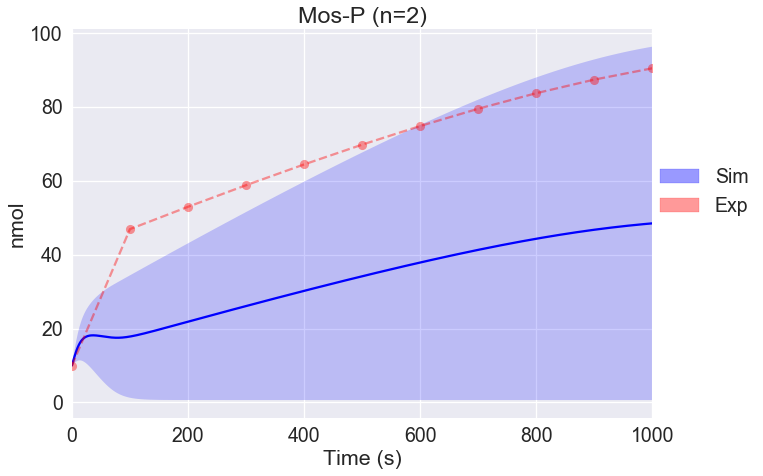

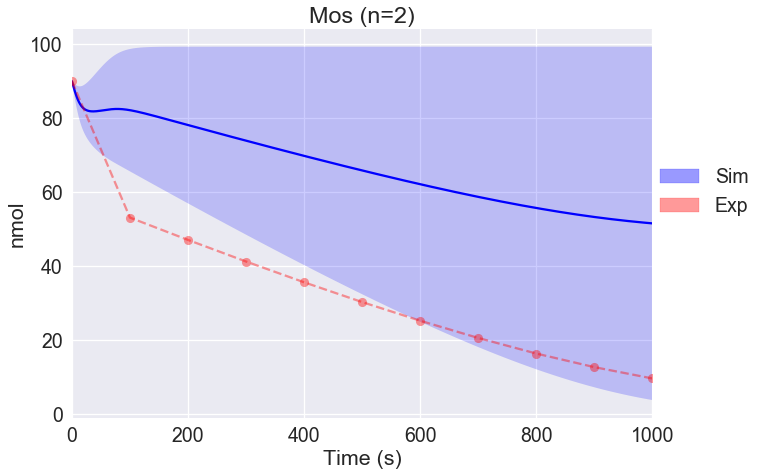

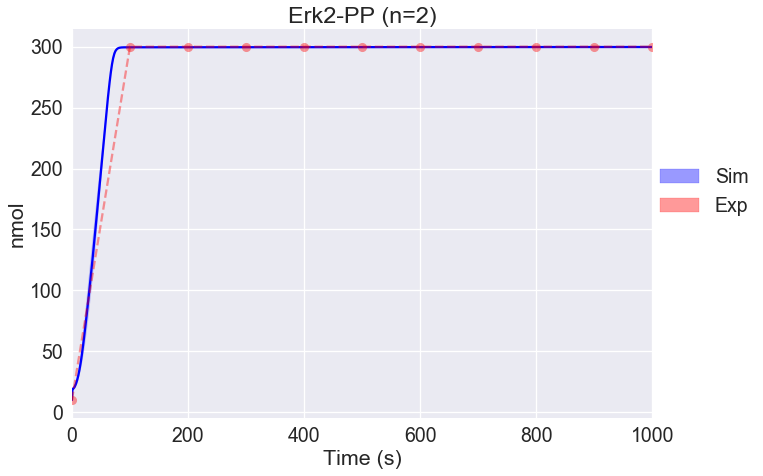

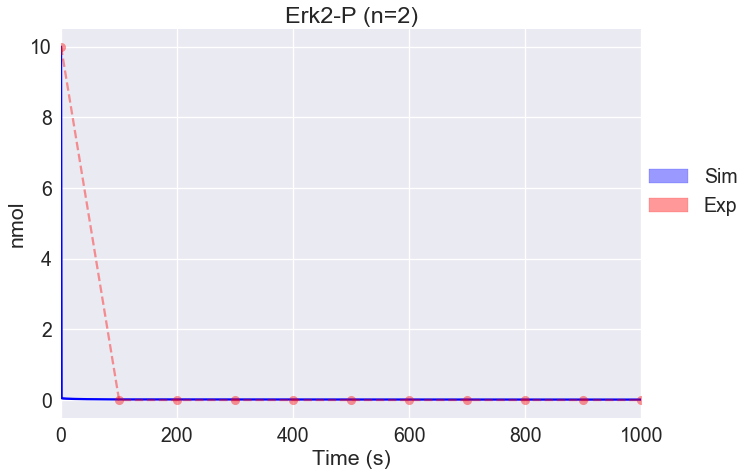

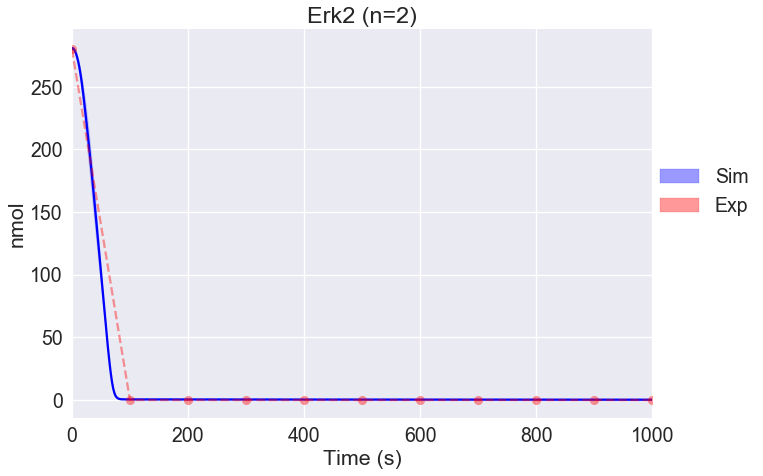

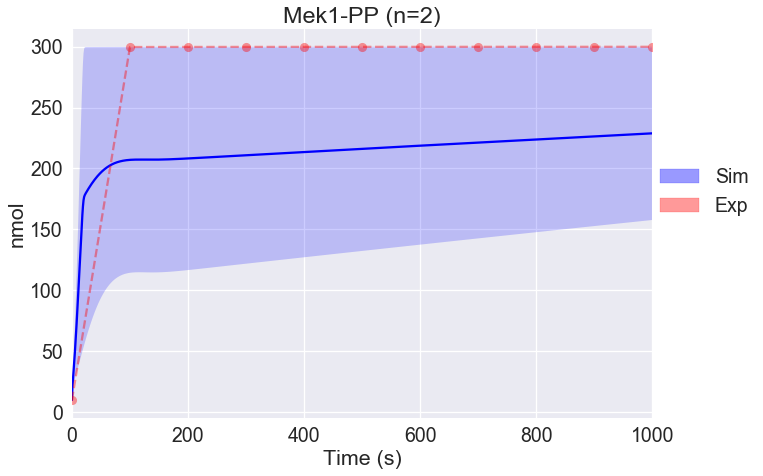

In [20]:
viz.PlotTimeCourseEnsemble(MPE, truncate_mode='ranks', theta=[0, 1])